In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets, transforms, models
import numpy as np
from datetime import datetime
import sys,os
from glob import glob
import imageio

In [2]:
#Get the data
!wget -nc https://lazyprogrammer.me/course_files/Food-5K.zip

--2023-08-12 18:02:12--  https://lazyprogrammer.me/course_files/Food-5K.zip
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447001986 (426M) [application/zip]
Saving to: ‘Food-5K.zip’

Food-5K.zip         100%[===================>] 426.29M  5.30MB/s    in 52s     

2023-08-12 18:03:06 (8.14 MB/s) - ‘Food-5K.zip’ saved [447001986/447001986]



In [3]:
!ls

Food-5K.zip  sample_data


In [4]:
!unzip -qq -o Food-5K.zip

In [5]:
!ls Food-5K

evaluation  training  validation


In [6]:
!ls Food-5K/training

0_0.jpg     0_1387.jpg	0_422.jpg  0_809.jpg   1_1195.jpg  1_230.jpg  1_617.jpg
0_1000.jpg  0_1388.jpg	0_423.jpg  0_80.jpg    1_1196.jpg  1_231.jpg  1_618.jpg
0_1001.jpg  0_1389.jpg	0_424.jpg  0_810.jpg   1_1197.jpg  1_232.jpg  1_619.jpg
0_1002.jpg  0_138.jpg	0_425.jpg  0_811.jpg   1_1198.jpg  1_233.jpg  1_61.jpg
0_1003.jpg  0_1390.jpg	0_426.jpg  0_812.jpg   1_1199.jpg  1_234.jpg  1_620.jpg
0_1004.jpg  0_1391.jpg	0_427.jpg  0_813.jpg   1_119.jpg   1_235.jpg  1_621.jpg
0_1005.jpg  0_1392.jpg	0_428.jpg  0_814.jpg   1_11.jpg    1_236.jpg  1_622.jpg
0_1006.jpg  0_1393.jpg	0_429.jpg  0_815.jpg   1_1200.jpg  1_237.jpg  1_623.jpg
0_1007.jpg  0_1394.jpg	0_42.jpg   0_816.jpg   1_1201.jpg  1_238.jpg  1_624.jpg
0_1008.jpg  0_1395.jpg	0_430.jpg  0_817.jpg   1_1202.jpg  1_239.jpg  1_625.jpg
0_1009.jpg  0_1396.jpg	0_431.jpg  0_818.jpg   1_1203.jpg  1_23.jpg   1_626.jpg
0_100.jpg   0_1397.jpg	0_432.jpg  0_819.jpg   1_1204.jpg  1_240.jpg  1_627.jpg
0_1010.jpg  0_1398.jpg	0_433.jpg  0_81.jpg    1_1205.j

In [7]:
!mv Food-5K/* .

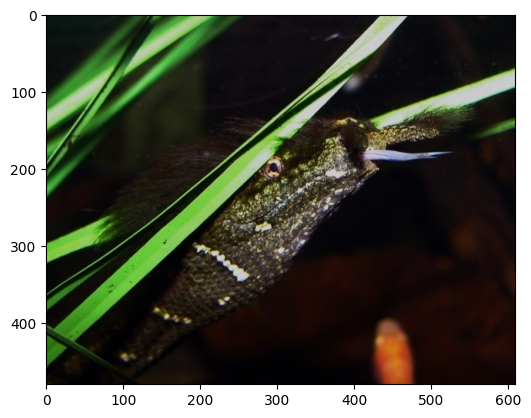

In [8]:
plt.imshow(imageio.v2.imread("training/0_1095.jpg"))
plt.show()

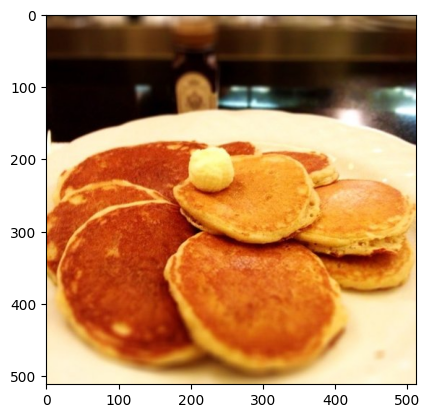

In [9]:
plt.imshow(imageio.v2.imread("training/1_338.jpg"))
plt.show()

In [10]:
#Creating the Data directory inorder to use imageFolder functionality

!mkdir data
!mkdir data/train
!mkdir data/test
!mkdir data/train/nonfood
!mkdir data/test/nonfood
!mkdir data/train/food
!mkdir data/test/food

In [11]:
!mv training/0*.jpg data/train/nonfood
!mv validation/0*.jpg data/test/nonfood
!mv training/1*.jpg data/train/food
!mv validation/1*.jpg data/test/food

In [12]:
transform = transforms.Compose([transforms.Resize(size=256),
                                     transforms.CenterCrop(size=224),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])

                                     ])

In [13]:
#Dataset

train_dataset = datasets.ImageFolder("data/train",transform = transform)
test_dataset = datasets.ImageFolder("data/test",transform =transform)

In [14]:
#Dataloader
batch_size = 128
train_data = torch.utils.data.DataLoader(dataset = train_dataset,batch_size = batch_size,shuffle = True )
test_data = torch.utils.data.DataLoader(dataset = test_dataset,batch_size = batch_size,shuffle = False )

In [15]:
#model VGG

model = models.vgg16(pretrained= True)
for i in model.parameters():
  i.requires_grad = False



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:01<00:00, 327MB/s]


In [16]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [17]:
class vggfeatures(nn.Module):
  def __init__(self,vgg):
    super(vggfeatures,self).__init__()

    self.vgg = vgg

  def forward(self,x):

      out = self.vgg.features(x)
      out = self.vgg.avgpool(out)
      out = out.view(out.size(0),-1)
      return out

In [18]:
Ntrain = len(train_dataset)
Ntest = len(test_dataset)


In [19]:
vggf = vggfeatures(model)

In [20]:
out = vggf(torch.rand(1,3,224,224))
out.shape

torch.Size([1, 25088])

In [21]:
D = out.shape[1]
type(D)

int

In [22]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [23]:
vggf.to(device)

vggfeatures(
  (vgg): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (16)

In [24]:
#Prepare numpy arrays to store the feature data

X_train = np.zeros((Ntrain, D))
X_test = np.zeros((Ntest,D))
Y_train = np.zeros((Ntrain,1))
Y_test = np.zeros((Ntest,1))

In [25]:
#Get the vgg features for train data and test data



with torch.no_grad():
  i =0
  for inputs,targets in train_data:

    inputs = inputs.to(device)

    bs = len(inputs)

    outputs = vggf(inputs)

    X_train[i:i+bs] = outputs.cpu().detach().numpy()
    Y_train[i:i+bs]  = targets.view(-1,1).numpy()
    i+=bs

  i =0
  for inputs,targets in test_data:

    inputs = inputs.to(device)

    bs = len(inputs)

    outputs = vggf(inputs)

    X_test[i:i+bs] = outputs.cpu().detach().numpy()
    Y_test[i:i+bs]  = targets.view(-1,1).numpy()


    i+=bs


In [26]:
X_train.max(), X_train.min()

(62.146148681640625, 0.0)

In [27]:
#Standardize the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [33]:
#We can use sklearn's Logistic Regression

from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train_s,Y_train.flatten())
print("training score", logr.score(X_train_s,Y_train.flatten()))
print("test score", logr.score(X_test,Y_test.flatten()))

training score 1.0
test score 0.846


In [34]:
#Logistic Regression using PyTorch

model = nn.Linear(D,1)

In [35]:
model.to(device)

Linear(in_features=25088, out_features=1, bias=True)

In [36]:
#optimizer

criterion = nn.BCEWithLogitsLoss()
optimizer  = torch.optim.Adam(model.parameters())

In [38]:
#make datasets

train_dataset2 = torch.utils.data.TensorDataset(torch.from_numpy(X_train_s.astype("float32")),torch.from_numpy(Y_train.astype("float32")))
test_dataset2 = torch.utils.data.TensorDataset(torch.from_numpy(X_test_s.astype("float32")),torch.from_numpy(Y_test.astype("float32")))

In [40]:
#Data loaders
batch_size = 128
train_data_2 = torch.utils.data.DataLoader(dataset = train_dataset2, batch_size = batch_size,shuffle = True)
test_data_2 = torch.utils.data.DataLoader(dataset = test_dataset2, batch_size = batch_size, shuffle = False)

In [41]:

#training

epochs = 10
train_loss_1 = np.zeros(epochs)
test_loss_1 = np.zeros(epochs)

for i in range(epochs):


  t_0 = datetime.now()
  loss_t = []
  for inputs,targets in train_data_2:



    inputs,targets = inputs.to(device), targets.to(device)

    optimizer.zero_grad()

    outputs = model(inputs)

    loss_train = criterion(outputs,targets)

    loss_train.backward()

    optimizer.step()

    loss_t.append(loss_train.item())

  train_loss = np.mean(loss_t)
  train_loss_1[i] = train_loss

  loss_test1 = []

  for inputs,targets in test_data_2:


    inputs,targets = inputs.to(device), targets.to(device)

    outputs = model(inputs)

    loss_test = criterion(outputs,targets)



    loss_test1.append(loss_test.item())

  test_loss = np.mean(loss_test1)
  test_loss_1[i] = test_loss

  dt = datetime.now() - t_0
  print(f"epoch -- {i+1}/{epochs}, training loss -- {train_loss}, test loss -- {test_loss}, Duration -- {dt}")

epoch -- 1/10, training loss -- 0.0996729451386879, test loss -- 0.03705628524767235, Duration -- 0:00:00.270045
epoch -- 2/10, training loss -- 0.007607683633978013, test loss -- 0.034206724260002375, Duration -- 0:00:00.190422
epoch -- 3/10, training loss -- 0.0011891633572910603, test loss -- 0.033812362438766286, Duration -- 0:00:00.194533
epoch -- 4/10, training loss -- 0.000717001203156542, test loss -- 0.03359004933736287, Duration -- 0:00:00.200059
epoch -- 5/10, training loss -- 0.0005479719050830075, test loss -- 0.03363787749549374, Duration -- 0:00:00.186448
epoch -- 6/10, training loss -- 0.0004716801146666209, test loss -- 0.03366677142912522, Duration -- 0:00:00.194773
epoch -- 7/10, training loss -- 0.00041136286017717794, test loss -- 0.03382109521771781, Duration -- 0:00:00.198017
epoch -- 8/10, training loss -- 0.0003443718772662881, test loss -- 0.03387675966951065, Duration -- 0:00:00.187157
epoch -- 9/10, training loss -- 0.0003048727624748911, test loss -- 0.0339

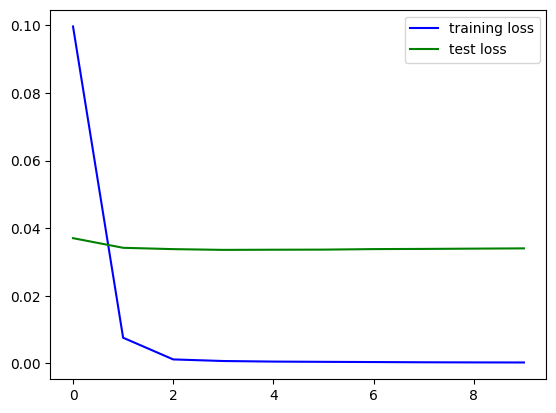

In [42]:

#plotting losses
plt.plot(train_loss_1,label = "training loss", color = "blue")
plt.plot(test_loss_1,label = "test loss", color = "green")
plt.legend()
plt.show()

In [44]:

#Accuracy

n_correct = 0
n_total= 0

for inputs, targets in train_data_2:

  inputs, targets = inputs.to(device), targets.to(device)

  outputs = model(inputs)

  predictions = outputs>0

  n_correct += (predictions==targets).sum()
  n_total += len(targets)

Accuracy_train = n_correct/n_total

for inputs, targets in test_data_2:

  inputs, targets = inputs.to(device), targets.to(device)

  outputs = model(inputs)

  predictions = (outputs > 0)

  n_correct += (predictions==targets).sum()
  n_total += len(targets)

Accuracy_test = n_correct/n_total


print("training accuracy -- ", Accuracy_train)
print("test accuracy -- ", Accuracy_test)

training accuracy --  tensor(1., device='cuda:0')
test accuracy --  tensor(0.9968, device='cuda:0')
